
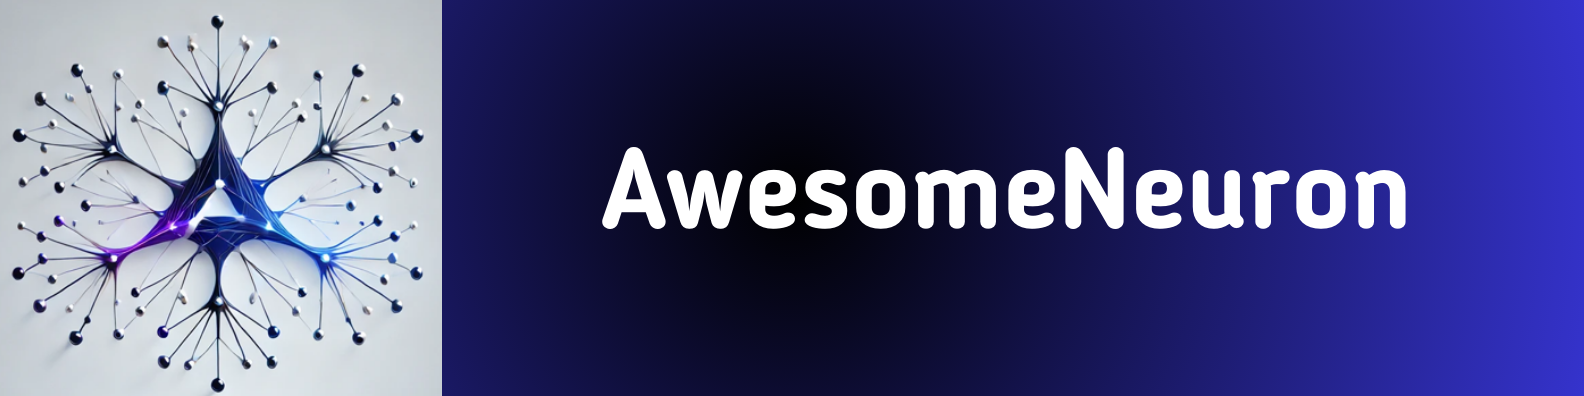

- **Newsletter:** [https://awesomeneuron.substack.com/](https://awesomeneuron.substack.com/)
- **Linkedin:**: https://www.linkedin.com/in/analyticalrohit
- **Code:** [https://github.com/analyticalrohit/pytorch_fundamentals](https://github.com/analyticalrohit/pytorch_fundamentals)
- **Author:** [Rohit Kumar Tiwari](https://www.linkedin.com/in/analyticalrohit)

# PyTorch Fundamentals: Your First Steps into Hands-on Deep Learning

This notebook provides an introduction to PyTorch, covering tensor initialization, operations, indexing, and reshaping. 
Follow along to learn the basics with clear examples and detailed explanations.

# Table of Contents

- [What are Tensors?](#What-are-Tensors?)
- [Tensor Initialization](#Tensor-Initialization)
- [Common Tensor Initialization Methods](#Common-Tensor-Initialization-Methods)
- [Tensor Type Conversion](#Tensor-Type-Conversion)
- [Converting Between NumPy Arrays and Tensors](#Converting-Between-NumPy-Arrays-and-Tensors)
- [Tensor Mathematics and Comparison Operations](#Tensor-Mathematics-and-Comparison-Operations)
- [Matrix Multiplication and Batch Operations](#Matrix-Multiplication-and-Batch-Operations)
- [Broadcasting and Other Useful Operations](#Broadcasting-and-Other-Useful-Operations)
- [Tensor Indexing](#Tensor-Indexing)
- [Tensor Reshaping](#Tensor-Reshaping)

In [22]:
import torch
import numpy as np
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Print versions
print("torch version:", torch.__version__)
print("numpy version:", np.__version__)

torch version: 2.4.0+cu118
numpy version: 1.26.3


## What are Tensors?

Tensor holds a multi-dimensional array of elements of a single data type which is very similar with numpy’s ndarray. When the dimension is zero, it can be called a scalar. When the dimension is 1, it can be called a vector. When the dimension is 2, it can be called a matrix. 

- 0-dimensional tensor: A single number (scalar).
- 1-dimensional tensor: A list of numbers (vector).
- 2-dimensional tensor: A table of numbers (matrix).

When the dimension is greater than 2, it is usually called a tensor. 

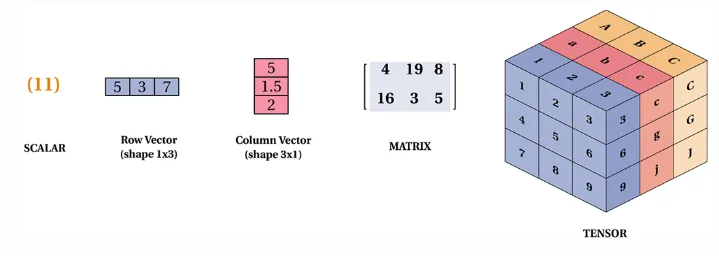

## Tensor Initialization

This code creates a 2×3 PyTorch tensor with float32 data type, assigns it to a specified device (CPU or GPU), and enables gradient tracking for backpropagation. 

In [23]:
# Check for CUDA availability and set the device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Initialize a 2x3 tensor with requires_grad enabled
my_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32, device=device, requires_grad=True)

print(my_tensor)
print("Data type:", my_tensor.dtype)
print("Device:", my_tensor.device)
print("Shape:", my_tensor.shape)
print("Requires Gradient:", my_tensor.requires_grad)

tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0', requires_grad=True)
Data type: torch.float32
Device: cuda:0
Shape: torch.Size([2, 3])
Requires Gradient: True


## Other Common Tensor Initialization Methods

- **Empty Tensor:** Creates an uninitialized 3×3 tensor (random values).
- **Zeros Tensor:** Creates a 3×3 tensor filled with zeros.
- **Random Tensor:** Generates a 3×3 tensor with random values between 0 and 1.
- **Ones Tensor:** Creates a 3×3 tensor filled with ones.
- **Identity Matrix:** Generates a 4×4 identity matrix (diagonal of ones).
- **Arange Tensor:** Creates a 1D tensor with values from 0 to 4 (step of 1).
- **Linspace Tensor:** Generates 5 evenly spaced values between 0.1 and 1.
- **Normal Distributed Tensor:** Fills a tensor with values from a normal (Gaussian) distribution with mean 0 and std 1.
- **Uniform Distributed Tensor:** Fills a tensor with values from a uniform distribution between 0 and 1.
- **Diagonal Tensor:** Creates a 4×4 diagonal tensor with ones along the diagonal and zeros elsewhere.

In [24]:
# Create an empty tensor of size 3x3
x = torch.empty(3, 3)
print("Empty Tensor:\n", x)

# Create a tensor filled with zeros
x = torch.zeros(3, 3)
print("Zeros Tensor:\n", x)

# Create a tensor with random values
x = torch.rand(3, 3)
print("Random Tensor:\n", x)

# Create a tensor filled with ones
x = torch.ones(3, 3)
print("Ones Tensor:\n", x)

# Create an identity matrix
x = torch.eye(4, 4)
print("Identity Matrix:\n", x)

# Create a tensor using arange
x = torch.arange(5)
print("Arange Tensor:\n", x)

# Create a tensor using linspace
x = torch.linspace(0.1, 1, 5)
print("Linspace Tensor:\n", x)

# Create a tensor with values drawn from a normal distribution
x = torch.empty(1, 5).normal_(mean=0, std=1)
print("Normal Distributed Tensor:\n", x)

# Create a tensor with values drawn from a uniform distribution
x = torch.empty(1, 5).uniform_(0, 1)
print("Uniform Distributed Tensor:\n", x)

Empty Tensor:
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Zeros Tensor:
 tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
Random Tensor:
 tensor([[0.9643, 0.1459, 0.7576],
        [0.3014, 0.5924, 0.1967],
        [0.5843, 0.1187, 0.0444]])
Ones Tensor:
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Identity Matrix:
 tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])
Arange Tensor:
 tensor([0, 1, 2, 3, 4])
Linspace Tensor:
 tensor([0.1000, 0.3250, 0.5500, 0.7750, 1.0000])
Normal Distributed Tensor:
 tensor([[-0.7517, -0.4783, -1.6978,  1.0087, -0.1160]])
Uniform Distributed Tensor:
 tensor([[0.0408, 0.3164, 0.1182, 0.5151, 0.5141]])


## Tensor Type Conversion

Creates a tensor with values [0, 1, 2, 3] and demonstrates type conversion to boolean, int16, int64, float16, float32, and float64.

In [25]:
# Create a tensor and convert its type
tensor = torch.arange(4)
print("Boolean Tensor:", tensor.bool())   # Convert to boolean
print("Short Tensor (int16):", tensor.short())   # Convert to int16
print("Long Tensor (int64):", tensor.long())   # Convert to int64
print("Half Tensor (float16):", tensor.half())   # Convert to float16
print("Float Tensor (float32):", tensor.float())   # Convert to float32
print("Double Tensor (float64):", tensor.double())   # Convert to float64

Boolean Tensor: tensor([False,  True,  True,  True])
Short Tensor (int16): tensor([0, 1, 2, 3], dtype=torch.int16)
Long Tensor (int64): tensor([0, 1, 2, 3])
Half Tensor (float16): tensor([0., 1., 2., 3.], dtype=torch.float16)
Float Tensor (float32): tensor([0., 1., 2., 3.])
Double Tensor (float64): tensor([0., 1., 2., 3.], dtype=torch.float64)


## Converting Between NumPy Arrays and Tensors

PyTorch makes it easy to switch between NumPy arrays and tensors, allowing seamless integration with existing computing workflows.

In [26]:
# Create a NumPy array of zeros
np_array = np.zeros((5, 5))
print("NumPy Array:\n", np_array)

# Convert NumPy array to PyTorch tensor
tensor = torch.from_numpy(np_array)
print("Tensor from NumPy Array:\n", tensor)

# Convert tensor back to NumPy array
numpy_back = tensor.numpy()
print("Converted Back to NumPy Array:\n", numpy_back)

NumPy Array:
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Tensor from NumPy Array:
 tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=torch.float64)
Converted Back to NumPy Array:
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


## Tensor Mathematics and Comparison Operations

This section explores essential math operations with PyTorch tensors. 
 
- **Addition & Subtraction:** Adds and subtracts two tensors element-wise.  
- **Division:** Uses true division for precise results.  
- **Inplace Operations:** Modifies a tensor directly without creating a new one.  
- **Exponentiation:** Raises each element to a power using `pow()` or `**`.  
- **Comparisons:** Checks conditions like `x > 0` or `x < 0`, returning boolean results.  
- **Dot Product:** Computes the sum of element-wise multiplications between two tensors. 

In [27]:
# Define two tensors for operations
x = torch.tensor([1, 2, 3])
y = torch.tensor([9, 8, 7])

# Addition
z = x + y
print("Addition Results:", z)

# Addition using .add
z1 = torch.empty(3)
torch.add(x, y, out=z1)
z2 = torch.add(x, y)
print("Addition Results:", z, z1, z2)

# Subtraction
z = x - y
print("Subtraction Result:", z)

# Division (true division)
z = torch.true_divide(x, y)
print("Division Result:", z)

# Inplace operations
t = torch.ones(3)
print("Before inplace addition:", t)
t.add_(x)
print("After inplace addition:", t)
t += x  # Another inplace addition (note: t = t + x creates a new tensor)
print("After second inplace addition:", t)

# Exponentiation
z = x.pow(2)
print("Exponentiation (pow):", z)
z = x**2
print("Exponentiation (**):", z)

# Comparisons
z = x > 0
print("x > 0:", z)
z = x < 0
print("x < 0:", z)

# Dot product
z = torch.dot(x, y)
print("Dot Product:", z)

Addition Results: tensor([10, 10, 10])
Addition Results: tensor([10, 10, 10]) tensor([10., 10., 10.]) tensor([10, 10, 10])
Subtraction Result: tensor([-8, -6, -4])
Division Result: tensor([0.1111, 0.2500, 0.4286])
Before inplace addition: tensor([1., 1., 1.])
After inplace addition: tensor([2., 3., 4.])
After second inplace addition: tensor([3., 5., 7.])
Exponentiation (pow): tensor([1, 4, 9])
Exponentiation (**): tensor([1, 4, 9])
x > 0: tensor([True, True, True])
x < 0: tensor([False, False, False])
Dot Product: tensor(46)


## Matrix Multiplication and Batch Operations

Matrix operations are at the heart of deep learning. Let's find out different ways to perform multiplication.

- **Matrix Multiplication:** Uses `@` or `torch.mm()` to perform standard matrix multiplication.  
- **Matrix Exponentiation:** Raises a square matrix to a power using `matrix_power(n)`.  
- **Element-wise Multiplication:** Uses `torch.mul()` or `*` for element-wise multiplication.  
- **Batch Matrix Multiplication:** Uses `torch.bmm()` to multiply batches of matrices efficiently.

In [28]:
# Matrix multiplication using @ operator and torch.mm
x2 = torch.tensor([[1, 2, 3]])
y2 = torch.tensor([[9, 8, 7]])

z = x2 @ torch.t(y2)
print("Matrix Multiplication (@ operator):\n", z)
z = torch.mm(x2, torch.t(y2))
print("Matrix Multiplication (torch.mm):\n", z)
z = x2.mm(torch.t(y2))
print("Matrix Multiplication (mm):\n", z)

# Matrix exponentiation: multiplying a matrix with itself 3 times
matrix_exp = torch.rand(5, 5)
print("Matrix multiplied 3 times:\n", matrix_exp @ matrix_exp @ matrix_exp)
print("Matrix power 3:\n", matrix_exp.matrix_power(3))

# Element-wise multiplication
z = torch.mul(x, y)
print("Element-wise Multiplication:", z)
z = x * y
print("Element-wise Multiplication (alternative):", z)

# Batch matrix multiplication
batch = 32
n, m, p = 10, 20, 30
tensor1 = torch.rand((batch, n, m))
tensor2 = torch.rand((batch, m, p))
out_bmm = torch.bmm(tensor1, tensor2)  # Result shape: (batch, n, p)
print("Batch Matrix Multiplication (first batch):\n", out_bmm[0])
print("Shape of batched multiplication result:", (tensor1 @ tensor2).shape)

Matrix Multiplication (@ operator):
 tensor([[46]])
Matrix Multiplication (torch.mm):
 tensor([[46]])
Matrix Multiplication (mm):
 tensor([[46]])
Matrix multiplied 3 times:
 tensor([[6.8649, 7.1375, 6.5783, 7.6163, 6.8593],
        [6.4644, 6.5831, 6.2444, 7.0148, 6.4003],
        [5.8586, 6.0872, 5.5466, 6.2068, 5.5633],
        [6.6579, 6.8326, 6.3734, 7.4843, 6.8450],
        [5.6023, 5.7104, 5.4097, 5.7048, 5.1312]])
Matrix power 3:
 tensor([[6.8649, 7.1375, 6.5783, 7.6163, 6.8593],
        [6.4644, 6.5831, 6.2444, 7.0148, 6.4003],
        [5.8586, 6.0872, 5.5466, 6.2068, 5.5633],
        [6.6579, 6.8326, 6.3734, 7.4843, 6.8450],
        [5.6023, 5.7104, 5.4097, 5.7048, 5.1312]])
Element-wise Multiplication: tensor([ 9, 16, 21])
Element-wise Multiplication (alternative): tensor([ 9, 16, 21])
Batch Matrix Multiplication (first batch):
 tensor([[3.5440, 6.5026, 6.5445, 4.5252, 5.2045, 5.7321, 6.1181, 6.6445, 6.0093,
         4.9353, 3.9677, 4.6019, 6.3319, 5.7043, 5.1247, 4.3091, 4.7

## Broadcasting and Other Useful Operations

Broadcasting allows arithmetic operations on tensors of different shapes. This section also demonstrates additional useful functions.

- **Broadcasting:** Automatically expands smaller tensors to match larger ones in operations.  
- **Summation:** `torch.sum(x, dim=0)` computes sum along a specific dimension.  
- **Min/Max Values:** `torch.max()` and `torch.min()` return the highest and lowest values along a dimension.  
- **Absolute Values:** `torch.abs(x)` gets the element-wise absolute values.  
- **Argmax/Argmin:** `torch.argmax()` and `torch.argmin()` return the index of max/min values.  
- **Mean Calculation:** `torch.mean(x.float(), dim=0)` computes the mean (ensuring float dtype).  
- **Element-wise Comparison:** `torch.eq(x, y)` checks equality between two tensors.  
- **Sorting:** `torch.sort(y, dim=0)` sorts tensor elements and returns indices.  
- **Clamping:** `torch.clamp(x, min=0)` restricts values within a range.  
- **Boolean Operations:** `torch.any(x_bool)` checks if any value is `True`, `torch.all(x_bool)` checks if all are `True`.  

In [29]:
# Broadcasting example
x1 = torch.rand(5, 5)
x2 = torch.rand(5)
print("Tensor x1:\n", x1)
print("Tensor x2:\n", x2)
print("x1 - x2:\n", x1 - x2)
print("x1 raised to the power of x2:\n", x1 ** x2)

# Sum of tensor elements along dimension 0
sum_x = torch.sum(x, dim=0)
print("Sum along dimension 0:", sum_x)

# Maximum and minimum values
value, indices = torch.max(x, dim=0)
print("Max value and index:", value, indices)

value, indices = torch.min(x, dim=0)
print("Min value and index:", value, indices)

# Other operations
print("Absolute values:", torch.abs(x))
print("Argmax:", torch.argmax(x, dim=0))
print("Argmin:", torch.argmin(x, dim=0))
print("Mean (converted to float):", torch.mean(x.float(), dim=0))
print("Element-wise equality (x == y):", torch.eq(x, y))

# Sorting
sorted_y, indices = torch.sort(y, dim=0, descending=False)
print("Sorted y and indices:", sorted_y, indices)

# Clamping values
print("Clamped x:", torch.clamp(x, min=0))

# Boolean operations
x_bool = torch.tensor([1, 0, 1, 1, 1], dtype=torch.bool)
print("Any True:", torch.any(x_bool))
print("All True:", torch.all(x_bool))

Tensor x1:
 tensor([[0.5610, 0.6928, 0.8066, 0.2603, 0.1528],
        [0.9867, 0.1102, 0.4665, 0.1929, 0.6669],
        [0.4671, 0.0768, 0.6585, 0.5024, 0.8904],
        [0.6634, 0.6646, 0.0860, 0.1698, 0.0833],
        [0.5990, 0.0964, 0.4688, 0.3539, 0.0450]])
Tensor x2:
 tensor([0.8125, 0.2102, 0.6983, 0.5526, 0.1509])
x1 - x2:
 tensor([[-0.2516,  0.4826,  0.1083, -0.2923,  0.0019],
        [ 0.1741, -0.1000, -0.2318, -0.3597,  0.5160],
        [-0.3454, -0.1334, -0.0397, -0.0503,  0.7396],
        [-0.1491,  0.4544, -0.6123, -0.3828, -0.0676],
        [-0.2135, -0.1138, -0.2294, -0.1988, -0.1058]])
x1 raised to the power of x2:
 tensor([[0.6252, 0.9258, 0.8606, 0.4753, 0.7532],
        [0.9892, 0.6290, 0.5872, 0.4028, 0.9407],
        [0.5388, 0.5831, 0.7470, 0.6836, 0.9826],
        [0.7164, 0.9177, 0.1803, 0.3754, 0.6873],
        [0.6594, 0.6116, 0.5892, 0.5632, 0.6264]])
Sum along dimension 0: tensor(6)
Max value and index: tensor(3) tensor(2)
Min value and index: tensor(1) ten

## Tensor Indexing

Access and modify tensor elements using indexing, slicing, and advanced indexing.

- **Accessing Rows & Columns:** Use `x[row, :]` for a row and `x[:, col]` for a column.  
- **Slicing:** `x[row, start:end]` extracts a portion of a row.  
- **Modifying Elements:** Directly assign values using `x[row, col] = value`.  
- **Fancy Indexing:** Use a list of indices to select multiple elements at once.  
- **Conditional Indexing:** Extract elements using conditions like `(x < 2) | (x > 8)`.  
- **Finding Even Numbers:** Use `x.remainder(2) == 0` to filter even values.  
- **Conditional Selection with `torch.where()`:** Chooses values based on a condition.  

In [30]:
# Create a random tensor with shape (batch_size, features)
batch_size = 10
features = 25
x = torch.rand((batch_size, features))

# Access the first row
print("First row of tensor:", x[0, :])

# Access the second column
print("Second column of tensor:", x[:, 1])

# Access the first 10 elements of the third row
print("First 10 elements of third row:", x[2, 0:10])

# Modify a specific element (set first element to 100)
x[0, 0] = 100

# Fancy indexing example
x1 = torch.arange(10)
indices = [2, 5, 8]
print("Fancy indexing result:", x1[indices])

# Advanced indexing: select elements based on a condition
x2 = torch.arange(10)
print("Elements where x2 < 2 or x2 > 8:", x2[(x2 < 2) | (x2 > 8)])
print("Even numbers in x2:", x2[x2.remainder(2) == 0])

# Using torch.where to select values based on a condition
print("Using torch.where:", torch.where(x2 > 5, x2, x2 * 2))


First row of tensor: tensor([0.1933, 0.0269, 0.3945, 0.6182, 0.3705, 0.7060, 0.4922, 0.0280, 0.3398,
        0.9600, 0.2417, 0.8861, 0.1833, 0.0985, 0.2710, 0.6410, 0.3799, 0.5981,
        0.0205, 0.9136, 0.9481, 0.6899, 0.9450, 0.6970, 0.1787])
Second column of tensor: tensor([2.6887e-02, 8.1319e-02, 9.8993e-01, 4.5033e-01, 5.7220e-04, 9.5527e-01,
        1.1555e-01, 9.4050e-02, 5.3863e-02, 5.0582e-01])
First 10 elements of third row: tensor([0.2450, 0.9899, 0.0546, 0.4938, 0.7471, 0.5465, 0.0106, 0.3488, 0.2002,
        0.4488])
Fancy indexing result: tensor([2, 5, 8])
Elements where x2 < 2 or x2 > 8: tensor([0, 1, 9])
Even numbers in x2: tensor([0, 2, 4, 6, 8])
Using torch.where: tensor([ 0,  2,  4,  6,  8, 10,  6,  7,  8,  9])


## Tensor Reshaping

Learn how to reshape tensors, concatenate them, and change the order of dimensions.

- **Reshape with `view()` & `reshape()`:** Change tensor shape without altering data.  
- **Transpose & Flatten:** `.t()` transposes, `.contiguous().view(-1)` flattens.  
- **Concatenation:** `torch.cat([x1, x2], dim=0/1)` merges tensors along rows/columns.  
- **Flattening:** `.view(-1)` converts a tensor into a 1D array.  
- **Batch Reshaping:** `.view(batch, -1)` keeps batch size while reshaping.  
- **Permute Dimensions:** `.permute(0, 2, 1)` reorders dimensions efficiently.  
- **Unsqueeze for New Dimensions:** `.unsqueeze(dim)` adds singleton dimensions.  

In [31]:
# Reshape a tensor using view and reshape
x = torch.arange(9)
x_3x3 = x.view(3, 3)
print("Reshaped to 3x3 using view:\n", x_3x3)
x_3x3 = x.reshape(3, 3)
print("Reshaped to 3x3 using reshape:\n", x_3x3)

# Transpose and flatten the tensor
y = x_3x3.t()
print("Flattened transposed tensor:", y.contiguous().view(9))

# Concatenation example
x1 = torch.rand(2, 5)
x2 = torch.rand(2, 5)
print("Concatenated along dimension 0 (rows):", torch.cat([x1, x2], dim=0).shape)
print("Concatenated along dimension 1 (columns):", torch.cat([x1, x2], dim=1).shape)

# Flatten the tensor using view(-1)
z = x1.view(-1)
print("Flattened tensor shape:", z.shape)

# Reshape with batch dimension
batch = 64
x = torch.rand(batch, 2, 5)
print("Reshaped to (batch, -1):", x.view(batch, -1).shape)

# Permute dimensions
z = x.permute(0, 2, 1)
print("Permuted tensor shape:", z.shape)

# Unsqueeze examples (adding new dimensions)
x = torch.arange(10)
print("Original x:", x)
print("x unsqueezed at dim 0:", x.unsqueeze(0).shape, x.unsqueeze(0))
print("x unsqueezed at dim 1:", x.unsqueeze(1).shape, x.unsqueeze(1))


Reshaped to 3x3 using view:
 tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
Reshaped to 3x3 using reshape:
 tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
Flattened transposed tensor: tensor([0, 3, 6, 1, 4, 7, 2, 5, 8])
Concatenated along dimension 0 (rows): torch.Size([4, 5])
Concatenated along dimension 1 (columns): torch.Size([2, 10])
Flattened tensor shape: torch.Size([10])
Reshaped to (batch, -1): torch.Size([64, 10])
Permuted tensor shape: torch.Size([64, 5, 2])
Original x: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x unsqueezed at dim 0: torch.Size([1, 10]) tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
x unsqueezed at dim 1: torch.Size([10, 1]) tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]])
